## Experiment 9
###  Write a Python program to implement  Naive Bayes classifier and calculate the accuracy, precision, and recall for your data set

In [20]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./00 Lab_Files/Iris_Dataset.csv')

# Define features and target
X = df.iloc[:, :4]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Model Report\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Model Report

Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Input new data for prediction

In [21]:
print("\nEnter new data for prediction\n")

sl = float(input('Enter sepal Length: '))
sw = float(input('Enter sepal Width: '))
pl = float(input('Enter petal Length: '))
pw = float(input('Enter petal Width: '))

# Make a prediction on the new input data
new_data = [[sl, sw, pl, pw]]
new_prediction = gnb.predict(new_data)
print("Predicted class:", new_prediction[0])



Enter new data for prediction



Enter sepal Length:  5.2
Enter sepal Width:  3
Enter petal Length:  1.6
Enter petal Width:  0.3


Predicted class: setosa


C:\Users\venki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Following Cells are not Required for Experiment

## Confusion Matrix with Normalized Values

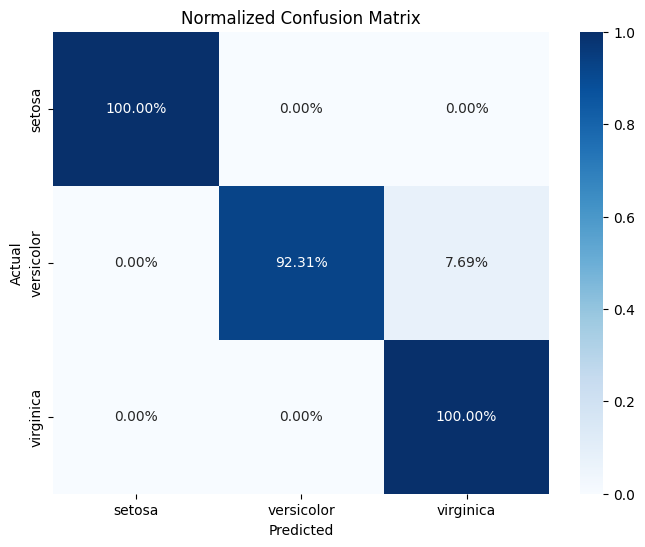

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

## Feature Importance (Class Conditional Probabilities)

In [11]:
feature_importances = pd.DataFrame(data=gnb.theta_, columns=X.columns, index=class_names)
print("Class Conditional Probabilities:\n", feature_importances)

Class Conditional Probabilities:
             sepal_length  sepal_width  petal_length  petal_width
setosa          4.964516     3.361290      1.467742     0.245161
versicolor      5.862162     2.724324      4.210811     1.302703
virginica       6.559459     2.986486      5.545946     2.005405


## Visualization of Feature Distributions

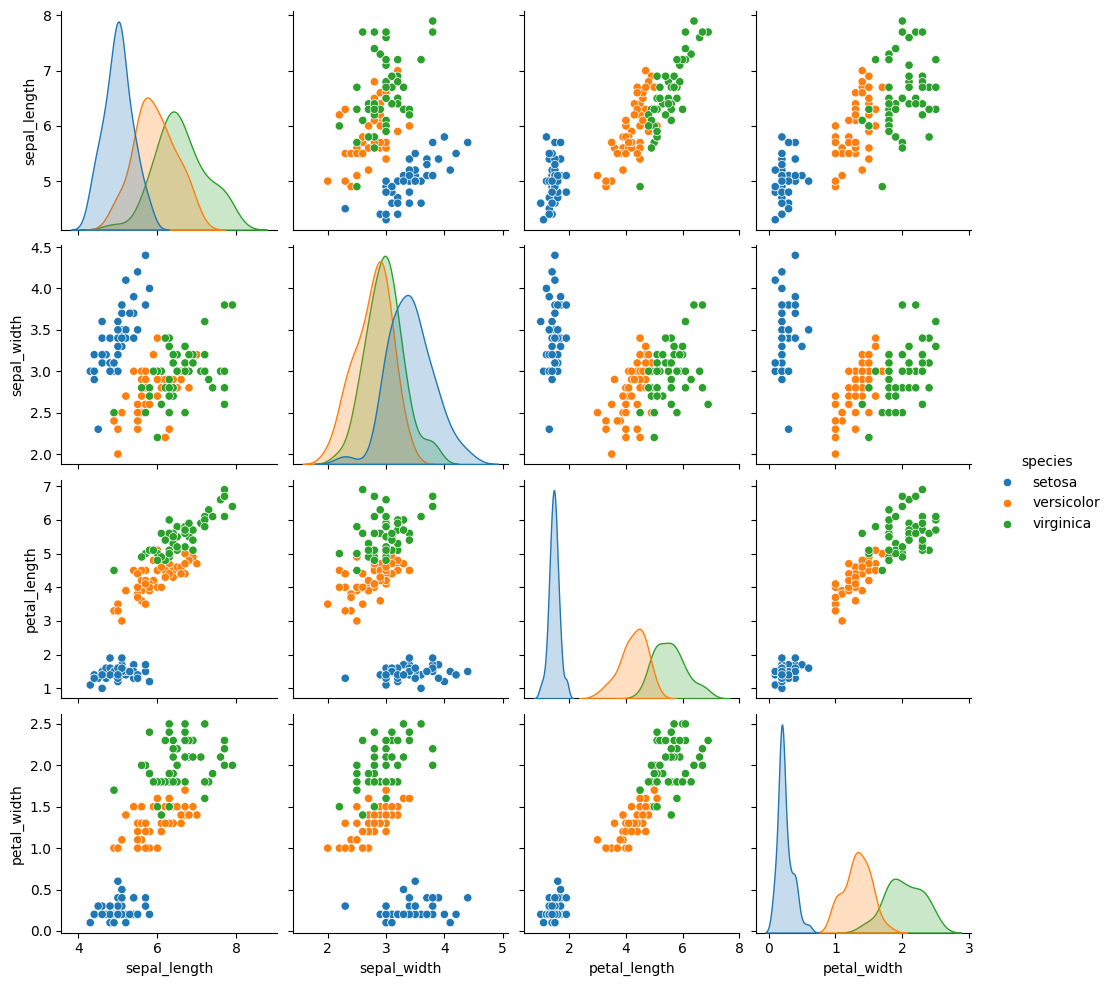

In [12]:
sns.pairplot(df, hue='species')  # Assuming 'species' is the column name for labels
plt.show()

# Cross-Validation for Robust Evaluation

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())

Cross-Validation Accuracy Scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-Validation Accuracy: 0.9533333333333334


## Visualizing New Prediction

In [17]:
new_data_df = pd.DataFrame(new_data, columns=X.columns)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'].factorize()[0], cmap='viridis', label='Dataset Points')
plt.scatter(new_data_df['sepal length (cm)'], new_data_df['sepal width (cm)'], color='red', marker='x', s=100, label='New Data Point')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

NameError: name 'new_data' is not defined